<a href="https://colab.research.google.com/github/MaxwellPaparelli/Machine_Learning/blob/main/Machin_Learn_PrevisaoAvc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning para prever AVC (Acidente vascular cerebral)

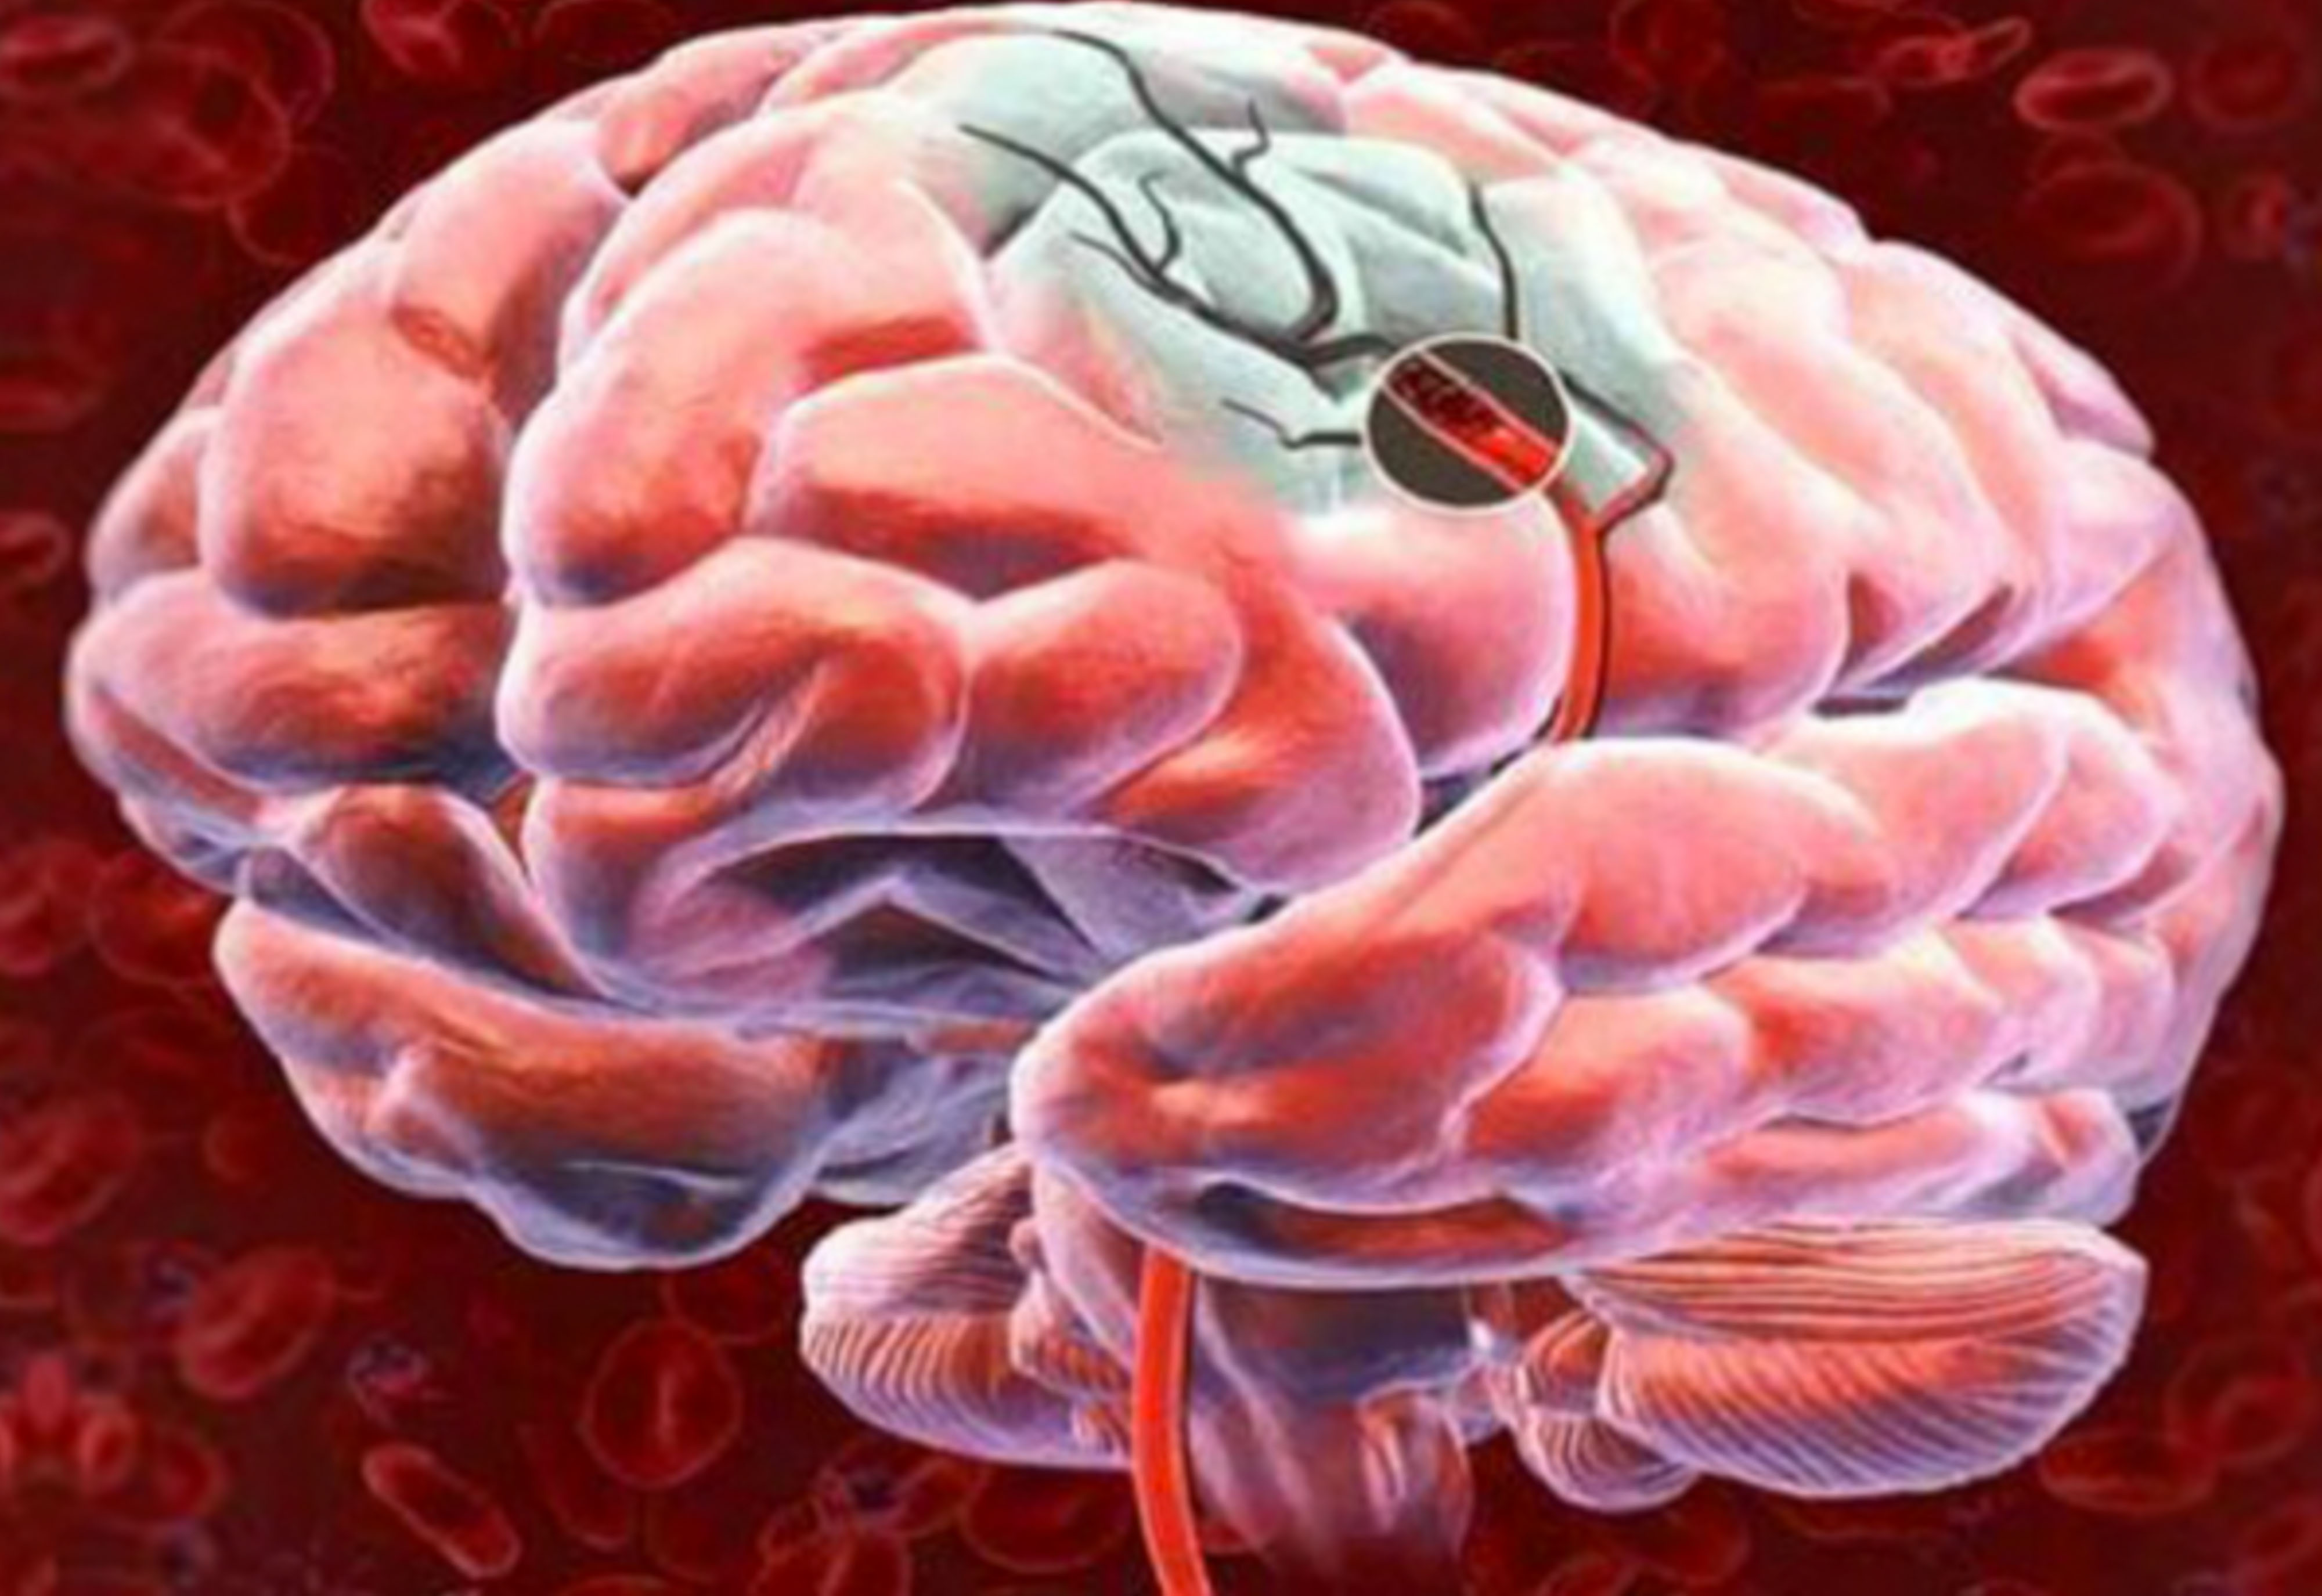

No mundo todo [(segundo a OMS)](https://www.who.int/bulletin/volumes/94/9/16-181636/en/) o AVC é a segunda causa principal de mortes e a terceira maior causa de incapacidade.

Este é um problema que vem crescendo cada vez mais principalmente em países de baixa e média renda e precisa de uma resposta global para diminuirmos estes índices.

E no Brasil não poderia ser diferente, pois temos no país o AVC como a segunda principal causa de mortes, sendo 101,1 mil mortes em 2017 e de 1 de janeiro á 16 de outubro de 2020 tivemos 78.649 pacientes que infelizmente foram a óbito. As idades que mais confirmaram óbitos, foram de homens com idade entre 70 e 79 anos e mulheres com idade entre 80 e 89 anos.

Clique aqui [neste site](https://agenciabrasil.ebc.com.br/saude/noticia/2020-10/lembrado-hoje-dia-mundial-do-avc-serve-de-alerta-populacao) para verificar a afirmação dos dados apresentados acima e também para verificar os sintomas, lembrando que se apresentados os sintomas procure o pronto atendimento o mais rápido possível.

Segundo a [OMS](https://www.who.int/bulletin/volumes/94/9/16-181636/en/) as estratégias de prevenção eficazes incluem direcionar os principais fatores modificáveis: hipertensão, lipídios elevados e diabetes. Riscos devido a fatores de estilo de vida também podem ser tratados: tabagismo, baixos níveis de atividade física, alimentação não saudável e obesidade abdominal, as combinações dessas estratégias de prevenção têm se mostrado eficazes na redução da mortalidade por AVC.

Pensando nisso vamos criar uma Machine Learning que tem como objetivo prever se um paciente irá ter um AVC.

# Importando os Dados

 Vamos importar as bibliotecas necessárias para nosso projeto e também nossa base de dados que há várias entradas de dados importantes como sexo, idade, diversados doenças e tabagismo que influenciam em o paciente ter o AVC.

Acesse o link para baixar a base, [clique aqui](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) 

In [45]:
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [46]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [47]:
#importar dataframe
data_path = "https://raw.githubusercontent.com/MaxwellPaparelli/Machine_Learning/main/PrevAVC.csv"
df = pd.read_csv(data_path)


# Analise Exploratória

Aqui podemos identificar a presença de dados nulos que podemos considerar outliers na coluna bmi, vou trata-los de forma que iremos classificar o dataframe com o sexo e depois com a idade e usar Forward Fill-ffill () para preencher o valor NaN para o IMC.

Podemos perceber também que temos alguns tipos de dados que estão como object e precisaremos converte-los em numéricos.


In [48]:
#Verificar as 5 primeiras entradas, podemos ver as colunas que estão como object e os valores NaN da coluna bmi
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [49]:
#Verificar o resumo estátistico que aparentemente está normal
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [50]:
#Verificar os tipos das colunas(váriaveis), podemos ver as colunas que estão como object
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [51]:
#Verificar os valores unicos das colunas
print("Valores Unicos:")
print(df.nunique().sort_values())

Valores Unicos:
hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
stroke                  2
gender                  3
smoking_status          4
work_type               5
age                   104
bmi                   418
avg_glucose_level    3979
id                   5110
dtype: int64


In [52]:
#Verificar os valores  nuloes, aqui podemos ver a quantidade de valores nulos da coluna bmi
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [53]:
# Classificando DataFrame com base no sexo e depois na idade e usando Forward Fill-ffill () para preencher o valor NaN para o IMC
df['bmi'] = df['bmi'].apply(lambda bmi_value: bmi_value if 12 < bmi_value < 60 else np.nan)

df.sort_values(['gender', 'age'], inplace=True)
df.reset_index(drop=True, inplace=True)
df['bmi'].ffill(inplace=True)

In [54]:
#Verificar novamente os valores nulos, repare que não temos mais valores nulos no dataframe
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Aqui iremos pegar nossa váriavel alvo que é a coluna "Stroke" para ver os resultados de casos em que o paciente teve um AVC ou não, lembrando que a classificação encontra-se da seguinte maneira:



*   1 paciente teve AVC
*   0 paciente não teve AVC



Podemos ver nitidamente que há um desbalanceamento nos casos onde o paciente teve um AVC para o que não teve um AVC, onde os pacientes que teve representa 4,87%. Por esse motivo teremos que fazer o balanceamento dos dados. 

Quantidade de AVC:
0    4861
1     249
Name: stroke, dtype: int64

Taxa de acidentes AVC representam: 4.872798%.


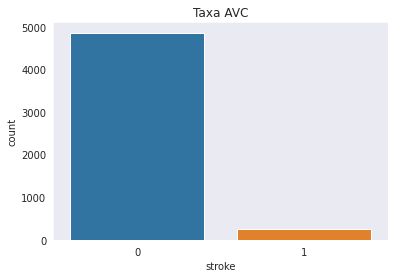

In [55]:
#Plotar a poercentagem de casos em que o paciente teve AVC
print("Quantidade de AVC:")
print(df.stroke.value_counts())
print("\nTaxa de acidentes AVC representam: {:4f}%.".format((df[df.stroke == 1].shape[0] / df.shape[0])*100))

#Plotar em um gráfico a quantidade de casos de AVC 
fig, ax = plt.subplots()
sns.countplot('stroke', data=df, ax=ax)
ax.set_title("Taxa AVC")
plt.show()

Antes de fazermos a preparação dos dados, iremos classificar as colunas (váriaveis) que estão como object para numérico, colocando um número para cada valor uníco conforme vimos anteriormente, iremos iniciar do número 0 em diante de acordo com a quantidade de valores únicos.

In [56]:
#Converter colunas object em numérico
gender_dict = {'Male': 0, 'Female': 1, 'Other': 2}
ever_married_dict = {'No': 0, 'Yes': 1}
work_type_dict = {'children': 0, 'Never_worked': 1, 'Govt_job': 2, 'Private': 3, 'Self-employed': 4}
residence_type_dict = {'Rural': 0, 'Urban': 1}
smoking_status_dict = {'Unknown': 0, 'never smoked': 1, 'formerly smoked':2, 'smokes': 3}

df['gender'] = df['gender'].map(gender_dict)
df['ever_married'] = df['ever_married'].map(ever_married_dict)
df['work_type'] = df['work_type'].map(work_type_dict)
df['Residence_type'] = df['Residence_type'].map(residence_type_dict)
df['smoking_status'] = df['smoking_status'].map(smoking_status_dict)

In [57]:
#Verificar novamente o tipo das colunas
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

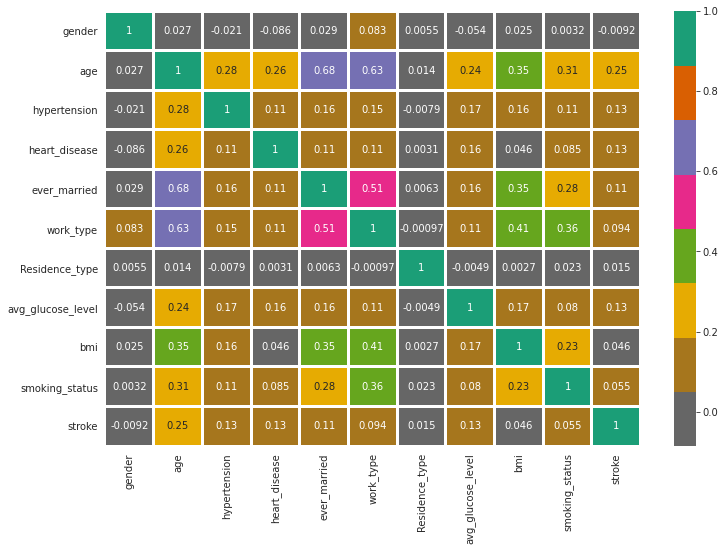

In [58]:
#Matriz de Correlação
plt.figure(figsize=(12,8)) 
sns.heatmap(df.drop('id', axis=1).corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


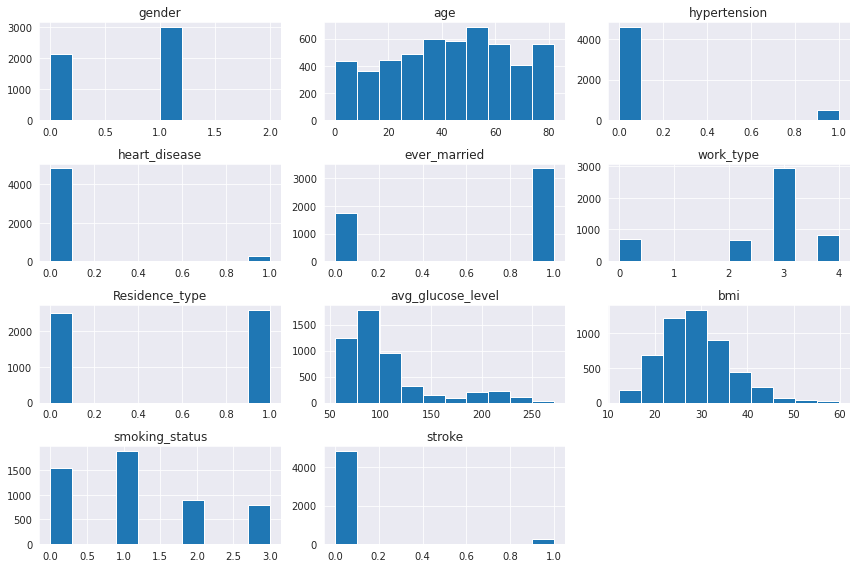

In [62]:
#plotar o histograma das Features para ver comportamento
fg, ax = plt.subplots(figsize=(12,8))
df.drop('id', axis=1).hist(ax=ax)
plt.tight_layout()

# Preparando dados

Para fazermos nosso modelo de Machine Learning, temos que fazer as seguintes preparações



1.   Dividir o dataframe em base de treino e teste.
2.   Balancear os dados, para evitar baixa performance nos casos de AVC, ou seja 1 na coluna "Stroke".





In [59]:
from sklearn.model_selection import train_test_split
# Dividindo as entradas das features e valores a ser previsto
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

# dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

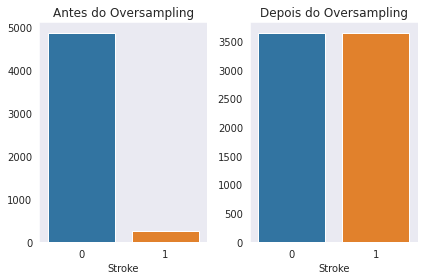

In [60]:
#Plotar gráfico onde mostra os dados inicialmente desbalanceados
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1)
ax1.set_title("Antes do Oversampling")
ax1.set_xlabel('Stroke')

#usando o método SMOTE para balancear os dados
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X_sm, y_sm = sm.fit_resample(X_train, y_train) 


#plotar gráfico onde mostra os dados balanceados
sns.barplot(x=['0', '1'], y =[sum(y_sm == 0), sum(y_sm == 1)], ax = ax2)
ax2.set_title("Depois do Oversampling")
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

# Modelo de Machine Learning

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada, pois você pode ter uma acurácia extremamente alta mas detectar um número muito baixo de casos onde seja positivo o AVC, podemos ver estes valores (as taxas de acertos) na matriz de confusão, ou também pela coluna Recall da classificação. Há vezes em que é melhor ter mais falsos positivos e investigar mais profundamente o caso (como também é o caso de fraudes no cartão de crédito) e ter um modelo menos preciso de acurácia.

Uma outra métrica considerada importante para se avaliar a eficácia é a AUC ROC, ou área sob a curva. No caso desse modelo de Regressão Logística, temos 80% de AUC.


[Classification Report] Regressão Logistica
Accuracy Score: 0.74
AUC: 0.80

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1216
           1       0.14      0.87      0.25        62

    accuracy                           0.74      1278
   macro avg       0.57      0.80      0.54      1278
weighted avg       0.95      0.74      0.81      1278



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


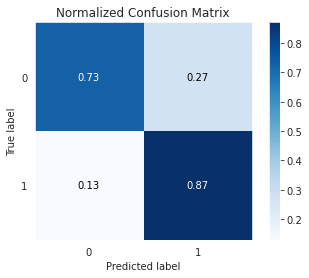

In [63]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)

print('\n[Classification Report] Regressão Logistica')
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))
# imprimir a área sob da curva AUC
print("AUC: {:.2f}\n".format(roc_auc_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))
# plotar a matrix de confusão
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

Chegamos a um bom resultado com uma acurácia de 74% e um AUC de 80%, mas claro que há sempre espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar os seus parâmetros.